## Final Project Submission

Please fill out:
* Student name: Megan Grant
* Student pace: Part Time
* Scheduled project review date/time: Wednesday July 3rd, 2pmEST
* Instructor name: Jeff Herman
* Blog post URL: https://datasciencediary.blog/2019/07/02/what-to-do-when-regression-doesnt-work/


# Section A: Data Exploration and Cleaning

For this first part of the project I need to get to know the data that I will be using and any potential flaws in the set. In order to do this, in the below section I will import the raw dataset as a pandas DataFrame and aim to answer the questions:

* What does the data look like/ what do all of the columns represent?
* Are there any empty fields or null values and if so, how should they be treated?
* Are there any major outliers that could affect later modelling?
* Are there any placeholders, or data that requires categorising?
* Does any of the data need reformatting in other ways?

I will try to answer these questions without being destructive to the original data set, so that I have the original to refer back too if needed, but a cleaned version to proceed with.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from math import sqrt

import pylab
from sklearn import preprocessing

%matplotlib inline
plt.style.use('seaborn-whitegrid');

sns.cubehelix_palette(8, start=.5, rot=-.75);

My first step is to import everything that I am going to need in the same place, so that I can more easily keep track throughout the project of what libraries have imported/ used. I have also set the style of the data visualisations so that all of my visualisations look coherent as I proceed.

In [2]:
df_raw = pd.read_csv("kc_house_data.csv")
df_raw.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df_raw.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# The below information was found in the columns.md file provided to us

In [4]:
from IPython.display import display, Markdown

with open('column_names.md', 'r') as fh:
    content = fh.read()

display(Markdown(content))

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
df_raw.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Initial thoughts on the dataset

Initially, my original bullet point questions yield the following answers:
* **What does the data look like/ what do all of the columns represent?**

*There are a total of 21 columns, with the column descriptions given above. It seems odd to me that there are so many sqft variants but that might be a interesting avenue to look at as a dependent variable of house price (sqft_living and sqft_basement/ sqft_above also look to be directly related so there will likely be multicollinearity).
Most of the columns seem sensible at the moment, i.e. the min/max for lat/ long are all in the same area which makes sense if this housing dataset is from the same county.*
* **Are there any empty fields or null values and if so, how should they be treated?**

*There are several columns with empty values, as can be seen in the info section. I will need to investigate 'waterfront', 'view', 'yr_renovated', in more detail. The first 2 look to be categorised and the third might need to be.*
* **Are there any major outliers that could affect later modelling?**

*The only obvious one so far is the datapiece that has 33 bedrooms .. that is likely to be far bigger and more expensive than the others in the set. I'll need to create a scatter graph or take a look at the data z scores though to see how many of these larger homes there are. My aim is to create a model for a typical house, so outliers will need to be removed.*
* **Are there any placeholders, or data that requires categorising?**

*The 'yr_renovated' category might need amending to a simpler 'renovated' column, with a 0/1 categorisation for whether the home has been renovated at all .. will investigate that once the empty fields have been cleaned. Other than that, there are no obvious placeholder values (i.e. negative values where all data should be above zero, 9999 placeholders etc) that need attending too.*
* **Does any of the data need reformatting in other ways?**

*The bathrooms column could be reformatted back to 'number of bathrooms total' rather than keeping it at 'number of bathrooms / bedrooms' as it would remove the dependency on bedrooms from that column and make a little more intuitive sense.*

In [7]:
# For the waterfront column, I'm checking how many rows have null values, as a percentage of the total.
round(((df_raw['waterfront'].isna().sum() / df_raw.shape[0]) * 100) , 0)

11.0

As over 10% of the total dataset are null values, to change the null values to either 0 or 1 only would significantly affect any potential correlation. Deleting the rows would also remove a large amount or other data. I either have the choice to remove the column all together, or to **randomly assign 0's / 1's to the NaN values in the same proportion as the column currently**.

In [8]:
df_raw['waterfront'].isna().sum()

2376

In [9]:
df_raw['waterfront'].value_counts('0')

0.0    0.992404
1.0    0.007596
Name: waterfront, dtype: float64

In [10]:
df_edited = df_raw.copy()

In [11]:
def replace_with_proportion(frame, column):
    isnull = frame[column].isnull()
    sample = frame[column].dropna()
    sample=set(sample)
    countframe = pd.DataFrame(columns=["name", "count", "proportion"])
    for x in sample:
        countframe.loc[-1] = [x,frame.loc[frame[column] == x].shape[0], 0 ]
        countframe.index = countframe.index + 1
    countframe['proportion']=countframe['count']/countframe['count'].sum()
    to_fill=np.random.choice(countframe['name'], size=(frame[column].isnull().sum(),), p=countframe['proportion'])
    frame.loc[isnull, column] = to_fill
    return frame.head()

In [12]:
replace_with_proportion(df_edited , 'waterfront')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Above I changed the waterfront data to replace any NaN values with 0 or 1 in the same proportion as the initial dataset. Now I need to check that that has been successful, and that the proportion of 0 and 1 values has not been affected.

In [13]:
df_raw['waterfront'].isna().sum()

2376

In [14]:
df_raw['waterfront'].value_counts('0')

0.0    0.992404
1.0    0.007596
Name: waterfront, dtype: float64

In [15]:
df_edited['waterfront'].isna().sum()

0

In [16]:
df_edited['waterfront'].value_counts('0')

0.0    0.992082
1.0    0.007918
Name: waterfront, dtype: float64

As can be seen above, the null values have been replaced without the overall distribution of the column being largely affected (within 0.002%).

I will now move onto the 'view' column to see if this needs any cleaning.

In [17]:
df_raw['view'].isna().sum()

63

In [18]:
df_raw['view'].value_counts('0')

0.0    0.901923
2.0    0.044441
3.0    0.023591
1.0    0.015325
4.0    0.014721
Name: view, dtype: float64

This column has a much smaller number of null values and doesn't look to have any other placeholders, so I will perform the same fill action as we did with the waterfront data column.

In [19]:
replace_with_proportion(df_edited, 'view')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [20]:
df_edited['view'].isna().sum()

0

In [21]:
df_edited['view'].value_counts('0')

0.0    0.902070
2.0    0.044358
3.0    0.023614
1.0    0.015280
4.0    0.014678
Name: view, dtype: float64

As can be seen, now the view column is also cleaned up with no null values and the same proportion of 'views' as before. Note that I am doing this in order to retain as much data as possible; the need to clean data will be considered when later drawing conclusions using the data.

Lastly I'll look at the 'yr_renovated' column to see what can be done with the null values and whether the column needs categorising.

In [22]:
#Checking how many of the total number of rows are null values, as a percentage of the total.
round(((df_raw['yr_renovated'].isna().sum() / df_raw.shape[0]) * 100) , 0)

18.0

A large portion of the data is missing therefore deleting rows would create a 18% loss to my overall dataset. Moreover the column is not yet categorised so the data could not be replaced easily with proportionate Yes/ No values. I therefore decided to drop the column from the edited dataset.

In [23]:
df_edited = df_edited.drop('yr_renovated', axis = 1)
df_edited.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


In [24]:
df_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(11), object(2)
memory usage: 3.3+ MB


Next I have focused on the 'sqft_basement' column as the format is different to the other sqft columns, then change it so that it is also int64.

In [25]:
df_edited['sqft_basement'].value_counts().head()

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

I've unexpectedly come across a placeholder value here, '?' occurs 454 times in the total dataset for the 'sqft_basement' column. I do not want to delete the rows and lose the other data, and there is the possibility that we can deduce the basement size from sqft_above / sqft_living:

In [26]:
len(df_edited.loc[(df_edited['sqft_basement'] == '?') & (df_edited['sqft_living'] > df_edited['sqft_above'])
       ,['sqft_living', 'sqft_above']])

170

From the above I can therefore see that there are 170 instances when the 'sqft_living' value for a house is larger than the 'sqft_above'. This difference can be deduced as the basement size. If sqft_living = sqft_above, I can deduce that there was no basement so will replace 'sqft_basement' with 0.

In [27]:
for i in list(df_edited.loc[df_edited['sqft_basement'] == '?'].index.values):
    df_edited.loc[i,'sqft_basement'] = (df_edited.loc[i,'sqft_living'] - df_edited.loc[i,'sqft_above']).astype(float)
df_edited['sqft_basement'] = df_edited['sqft_basement'].astype('float').astype('int64')

In [28]:
df_edited['sqft_basement'].value_counts().head()

0      13110
600      221
700      218
500      214
800      206
Name: sqft_basement, dtype: int64

The final step now in getting a clean dataset is to change the date format to datetime and check one last time for null values etc.

In [29]:
df_edited['date'] = pd.to_datetime(df_edited['date'])

Now  the data sets are complete, I have removed all placeholders and corrected the datatype. The only questions remaining are:

* **Should I reformat the bathroom column to be independent of bedrooms?**

*Don't think that I will. The bathroom description is open to interpretation based on the column data given and the correlation with other columns won't be affected if I edit the dataset or not. The simpler and cleaner approach is to uncomplicate the overall dataframe if possible, so I'm leaving it.*

* **Are there outliers?**

*Will check this one next using scatter plots and histograms to see extraneous datapoints.*

In [30]:
#Dropping all columns except continuous variables so that outliers are clearer.
df_outlier_check = df_edited.copy()
non_cnts = ["date","waterfront", "view", "zipcode", "lat", "long", "condition", "grade", "id"]
df_outlier_check = df_outlier_check.drop(non_cnts, axis = 1)
df_outlier_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(3), int64(8)
memory usage: 1.8 MB


My main debate here is whether to investigate all outliers or just potential outliers in the 'price' column (as price is my dependent variable throughout). 

If I identify outliers in all columns then I am treating potentially dropping data that would be completely valid in some subsets of this dataframe (that did not include the outlier's column).

However, one outlier datapoint might still make the whole row invalid if that outlier point has a relationship with price (i.e. a normal house that happens to have 20 tiny bedrooms might still have a high price if number of bedrooms and house price are positively correlated. I should discount the whole row instead of that high price affecting a different subset).

Eventually I will create a model that predicts house price using the given variables but until then, I will assume that all columns might affect house price and so will delete the whole row if an outlier is found.

In [31]:
# Finding the z scores for the continuous data then looking at the first few elements to sense-check.
z = np.abs(stats.zscore(df_outlier_check))
threshold = 3
df_z = np.where(z > 3)

x = df_z[0]
y = x.tolist()
rows_to_delete = set(y)
sorted(rows_to_delete)
len(rows_to_delete)

1358

This means that, using Z scores  with a z > 3 threshold to test the presence of outliers, there are 1352 rows of data to remove (6% of the total set). 

**This is a large amount of data but will still leave me with 94% of the original set, so I am comfortable to remove the outlier rows.**

In [32]:
# Finding the set of outliers and the rows that need deleting, then looking at the data again.
x = df_z[0]
y = x.tolist()
rows_to_delete = set(y)
df_outliers_removed = df_edited.copy()
for i in rows_to_delete:
    df_outliers_removed.drop(i, axis=0, inplace=True)
df_outliers_removed.shape

(20239, 20)

In [33]:
df_edited = df_outliers_removed.copy()
df_edited.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503


# Section B:  Exploring the appropriate dataset to use



Now that I have a dataset without outliers, I want to see if it is wise to focus on one part of the data in particular.

**It is unlikely that a linear model is going to predict USD100,000 homes as well as it will USD1,000,000 homes**. Some of these outliers have been removed in the above exercise, however I will now also take a look at how the price column is skewed to assess if I need to narrow the scope of my dataframe.

In [34]:
price = df_edited['price']
price.describe()

count    2.023900e+04
mean     4.934262e+05
std      2.453771e+05
min      7.800000e+04
25%      3.150000e+05
50%      4.399500e+05
75%      6.130000e+05
max      1.640000e+06
Name: price, dtype: float64

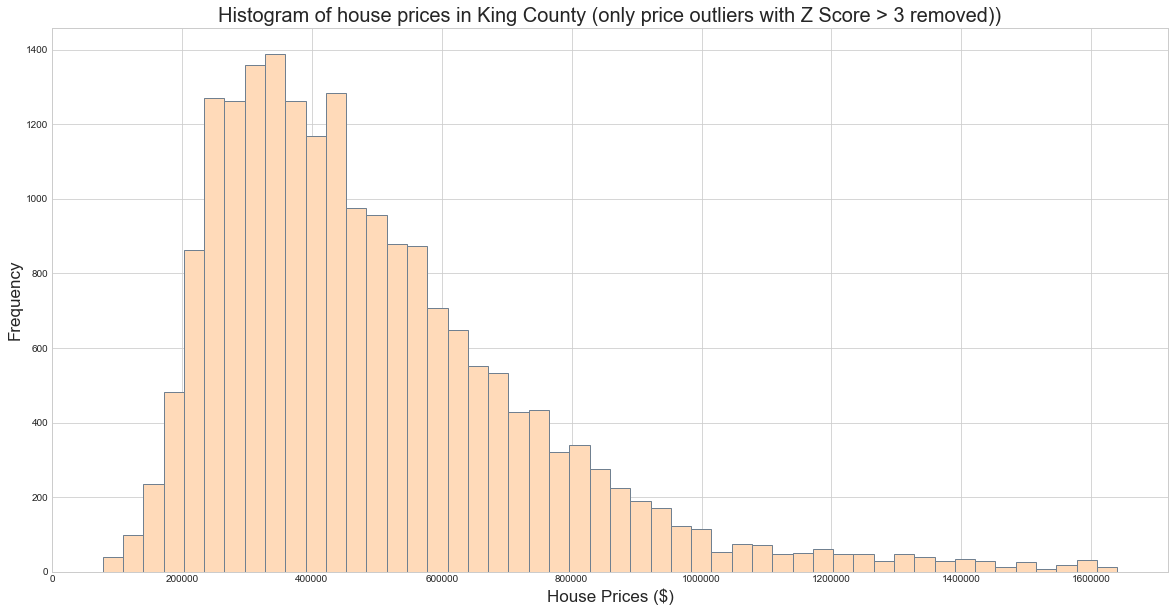

In [35]:
plt.hist(df_edited['price'], bins = 50, color = "peachpuff", edgecolor = 'slategrey');
# Add title and axis names
plt.xlabel('House Prices ($)', size = 17);
plt.ylabel('Frequency', size = 17);
plt.title("Histogram of house prices in King County (only price outliers with Z Score > 3 removed))", size = 20);
plt.gcf().set_size_inches((20, 10)) 
plt.show()

***The house price range for the total dataset is 78,000 - 1,640,000. The average house price is 439,950***. It is clear from the above that there is a skew to the price dataset. I want to create a model that predicts the ***majority*** of houses in the area therefore I need to investigate if a basic model, for example a single linear regression, will be accurate for the entire price range or if I should narrow the price scope. 

I will therefore:

1) Assess which continuous feature currently has the highest correlation with price

2) Run a simple linear regression 
 - Use the R squared value for this regression as a benchmark for future model accuracy
 
3) Create a graph of actual house prices vs predicted prices from the simple regression

4) Assess at which point the model loses accuracy.



In [36]:
# Find correlation between price and all features
pearsons_coeff = df_edited[df_edited.columns[0:]].corr()['price'][:-1]
pearsons_coeff.sort_values(ascending = False, inplace = True)
pearsons_coeff[0:5]

price            1.000000
grade            0.638162
sqft_living      0.626988
sqft_living15    0.555659
sqft_above       0.521863
Name: price, dtype: float64

Initial best fit line:
y = -635767.71 + 149611.50x


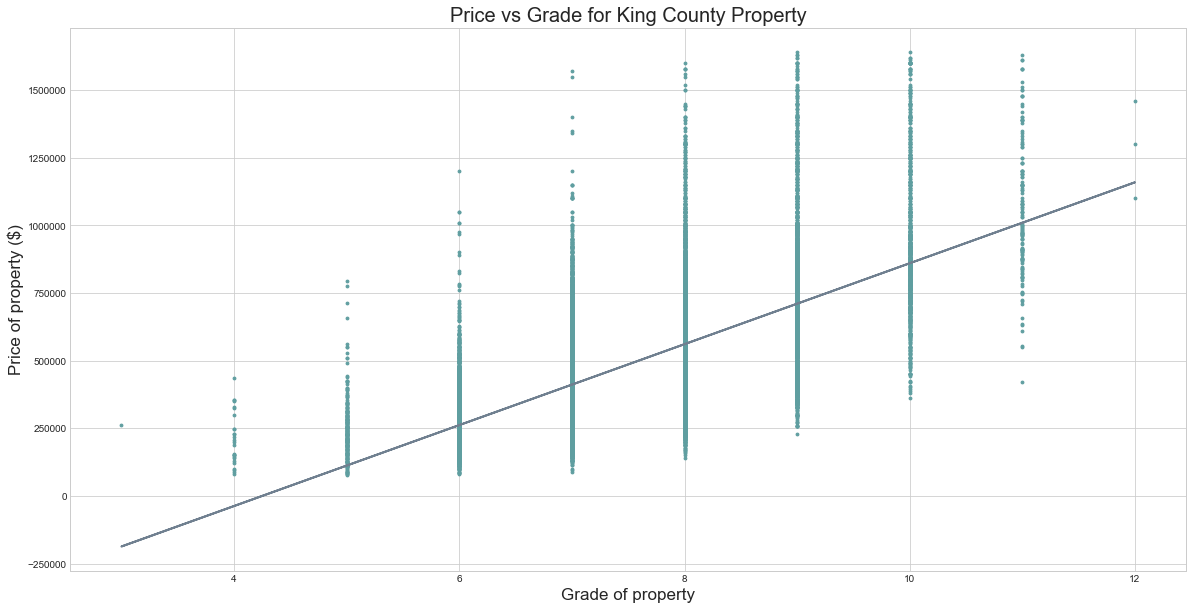

In [37]:
# Defining an initial line of best fit for the scatter graph of grade vs price
X = df_edited["grade"]
Y = df_edited["price"]

# solve for a and b
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('Initial best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

a, b = best_fit(X, Y)

# Plot an overlaid scatter and line graph to show approximate fit
plt.scatter(X, Y, color ="cadetblue", s = 8);
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit, c = 'slategray', linewidth = 2);

plt.xlabel('Grade of property', size = 17);
plt.ylabel('Price of property ($)', size = 17);
plt.title('Price vs Grade for King County Property', size = 20);
plt.gcf().set_size_inches((20, 10)) 
plt.show()

This is an initial look at the relationship between grade and price; clearly it isn't realistic as it suggests a negative price until grade > 4.2. However, it does show a linear trend so I will use the line of best fit to create a residuals vs actuals  plot. 

I also want to consider here the need to cut any data that will make my model less effective with the need to preserve the largest dataset possible; I want this model to be applicable to as many people as possible. 

Therefore, after consideration of the above price histogram I am going to use the 80th percentile as a measure to check linearity before/ after on the graphs.

In [38]:
#Finding the 85th quantile
p_80 = np.percentile(df_edited['price'], 80) # return 50th percentile, e.g median.
print("The 80th quantile of price is "+str(p_80))

The 80th quantile of price is 665000.0


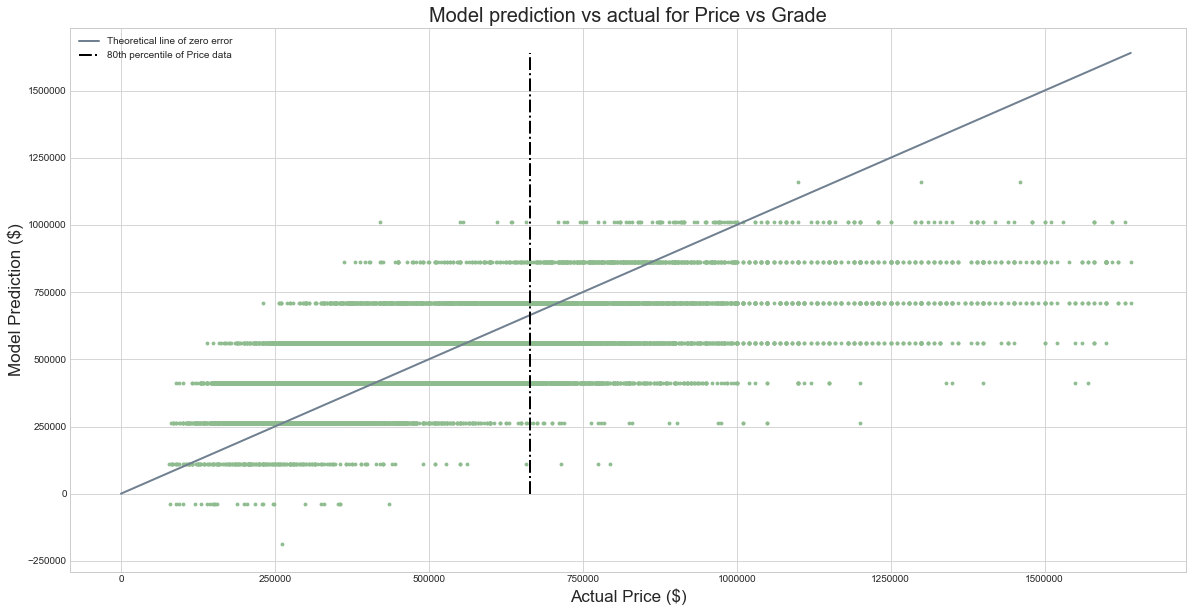

In [39]:
y_pred = []
for x in df_edited['grade']:
    y = b*x + a
    y_pred.append(y)
y_real = df_edited['price']

line_x = [0, np.max(y_real)]
line_y = [0, np.max(y_real)]
dash_x = [665000, 665000]

plt.plot(line_x, line_y, c='slategray', linewidth = 2, label = 'Theoretical line of zero error')
plt.plot(dash_x, line_y, c='black', ls = "-.", linewidth = 2, label = '80th percentile of Price data')
plt.scatter(y_real, y_pred, c = 'darkseagreen', s = 8);

plt.legend(loc = 2);
plt.xlabel('Actual Price ($)', size = 17);
plt.ylabel('Model Prediction ($)', size = 17);
plt.title('Model prediction vs actual for Price vs Grade', size = 20);
plt.gcf().set_size_inches((20, 10)) 
plt.show()

In [40]:
r2_score(y_real, y_pred)  

0.4072501309220419

The above shows the actual data price vs predicted price,therefore for a perfect model all datapoints would fall on the red line. 

It is clear from the above that the simple linear regression does not 100% predict house price but does follow a linear path, which is to be expected. You can see that  the model predicts the same price for hundreds of input values, because grade is an integer feature. 

Moreover, R squared for price~grade is 0.407, which we can use as the baseline for future models.

However, you can also see that above the 80th percentile, where (Actual price) > 665,000, the model is begins to become inconsistent and veers away more obviously from the linear path. 

**This suggests a decreased correlation for higher price values, which is consistent with the skew of price data.** I will confirm this below by running the same method for the highest correlated continuous variable, sqft_living.

Initial best fit line:
y = 89202.40 + 205.54x


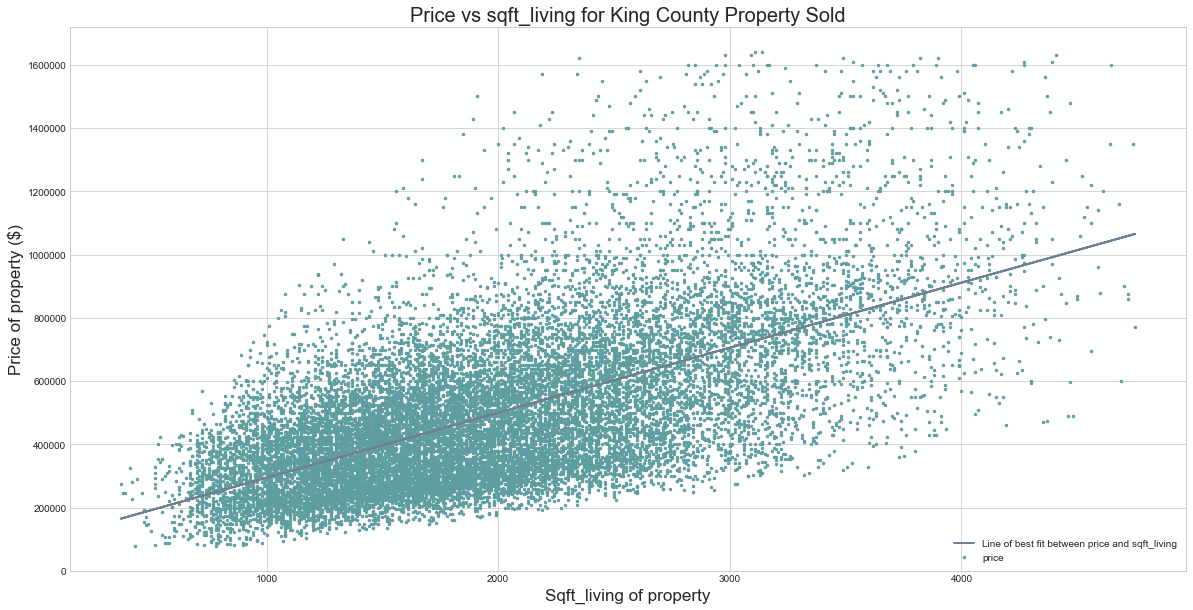

In [41]:
X_2 = df_edited["sqft_living"]
Y_2 = df_edited["price"]

e, d = best_fit(X_2, Y_2)

# Plot an overlaid scatter and line graph to show approximate fit
plt.scatter(X_2, Y_2, s = 6, c = 'cadetblue');
yfit2 = [e + d * xi for xi in X_2]
plt.plot(X_2, yfit2, c = 'slategray', linewidth = 2, label = 'Line of best fit between price and sqft_living')

plt.legend(loc = 4);
plt.xlabel('Sqft_living of property', size = 17);
plt.ylabel('Price of property ($)', size = 17);
plt.title('Price vs sqft_living for King County Property Sold', size = 20);
plt.gcf().set_size_inches((20, 10)) 
plt.show()

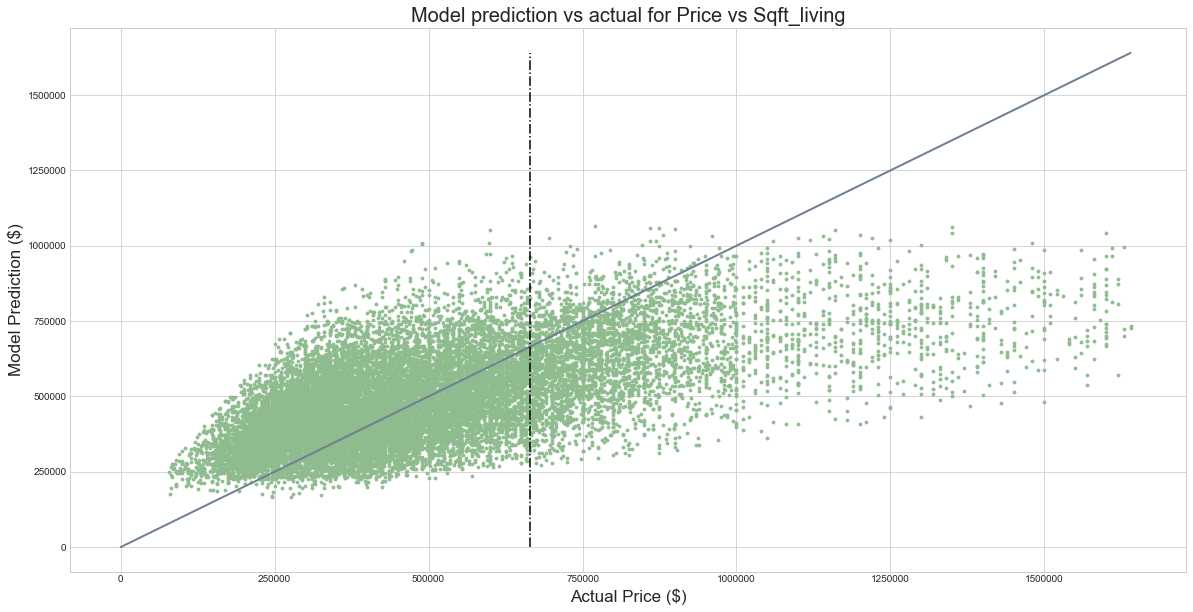

In [42]:
y_pred_2 = []
for z in df_edited['sqft_living']:
    y = d*z + e
    y_pred_2.append(y)
y_real = df_edited['price']

line_x = [0, np.max(y_real)]
line_y = [0, np.max(y_real)]
dash_x = [665000, 665000]

plt.plot(line_x, line_y, c='slategray', linewidth=2)
plt.plot(dash_x, line_y, c='black', ls = "-.")
plt.scatter(y_real, y_pred_2, s = 8, color = 'darkseagreen');

plt.xlabel('Actual Price ($)', size = 17);
plt.ylabel('Model Prediction ($)', size = 17);
plt.title('Model prediction vs actual for Price vs Sqft_living', size = 20);
plt.gcf().set_size_inches((20, 10)) 
plt.show()

In [43]:
r2_score(y_real, y_pred_2)

0.39311379498307175

The above confirms that after the upper quartile the correlation between price and the feature diminishes; **therefore I am going to reduce my dataset to house prices below USD665,000**.

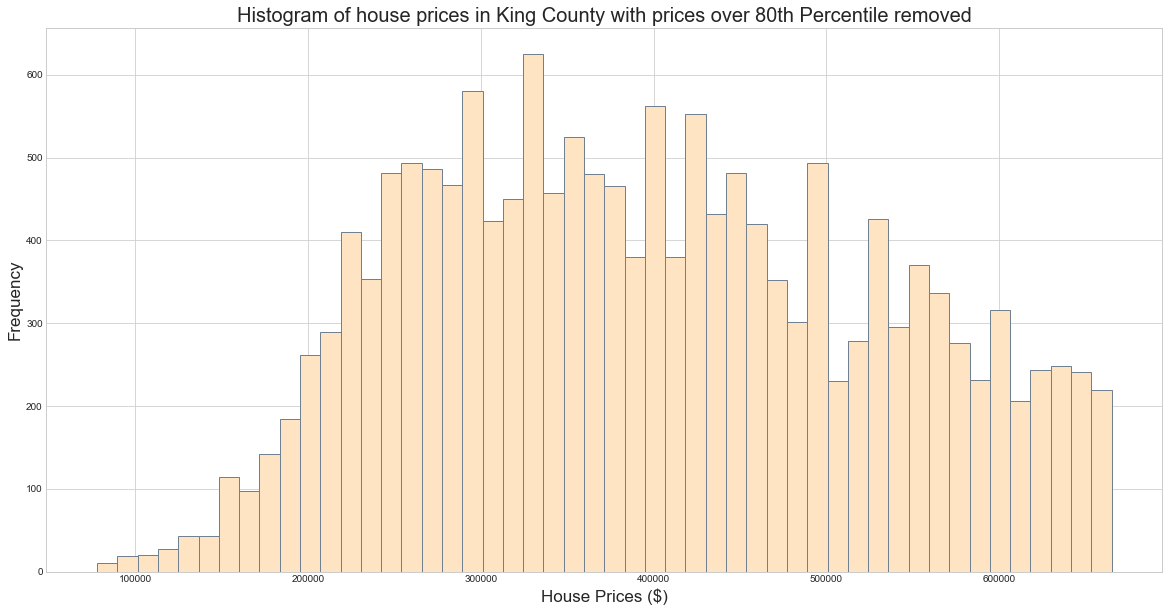

In [44]:
#Removing all rows with a house price over USD665,000.

df_edited = df_edited[~(df_edited['price'] > (np.percentile(df_edited['price'], 80)))]

plt.hist(df_edited['price'], bins = 50, color = "bisque", edgecolor = 'slategrey');
# Add title and axis names
plt.xlabel('House Prices ($)', size = 17);
plt.ylabel('Frequency', size = 17);
plt.title("Histogram of house prices in King County with prices over 80th Percentile removed", size = 20);
plt.gcf().set_size_inches((20, 10)) 
plt.show()

# Section C: Testing for multicollinearity and linear regression assumptions

Before moving on to setting (and trying to reject) the null hypotheses and ultimately creating my house price model, I want to check for any correlation in my dataset that might decrease the accuracy of models I create. 

I then have to check for linearity, normality and homoscedasticity of price vs each feature. Any later model will fail if I try to fit a non-linear dataset to a linear regression. I will therefore see here which variables have a linear relationship with house price, and discard any variables that do not.

### 1) Linearity 

This should be the quickest assumption to prove/ disprove as a plot of price vs feature will establish a broadly linear path or not.

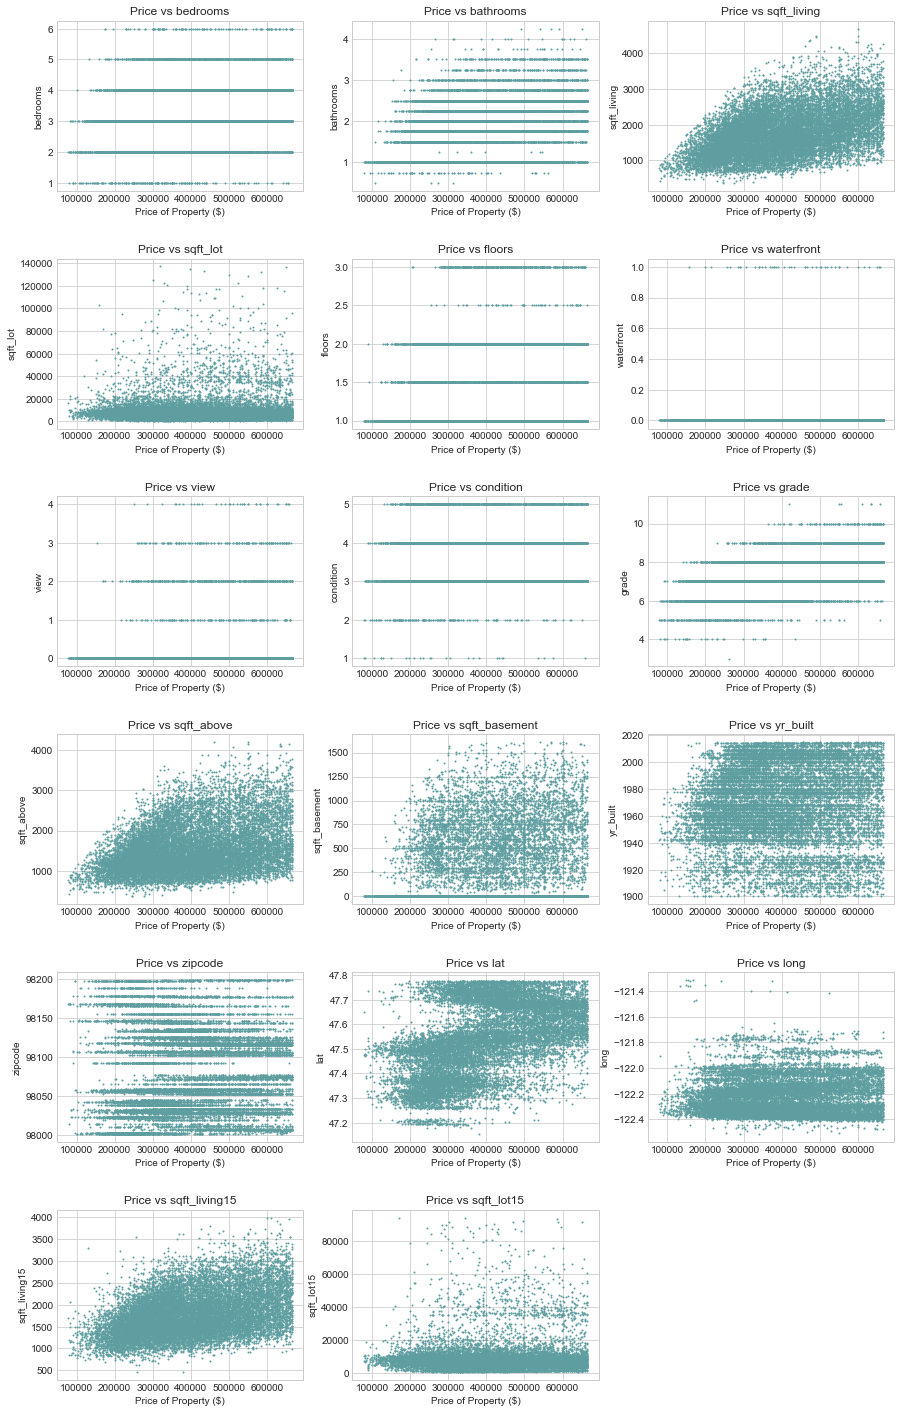

In [45]:
df_edited_2 = df_edited.copy().drop(["date", "id", "price"], axis = 1)
df_price = df_edited["price"]
fig = plt.figure(figsize = (15,25))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
for i in range(0, 17):
    ax = fig.add_subplot(6, 3, (i + 1))
    ax.scatter(df_price, df_edited_2.iloc[:,i], s = 1, color = 'cadetblue')
    ax.set_xlabel('Price of Property ($)')
    ax.set_ylabel("{}".format(df_edited_2.columns[i]))
    plt.title("Price vs {}".format(df_edited_2.columns[i]))

The categorical values are difficult to assess for linearity at this stage. Of the non-categorical variables - it is clear that zipcode, yr_built and sqft_basement do not have any relationship to the dependent variable price. Moreover, the waterfront column is clearly non-linear as there were (approximately) evenly dispersed waterfront and non-waterfront views at all prices. 

I will therefore also discard this data.

##### I am therefore going to remove zipcode, yr_built, waterfront and sqft_basement from the dataset.

In [46]:
df_edited_2.drop(["zipcode", "yr_built", "sqft_basement", "waterfront"], axis = 1, inplace = True)


In [47]:
df_edited_2 = df_edited_2.join(df_price, how = 'outer')
df_edited_2.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0.0,3,7,1180,47.5112,-122.257,1340,5650,221900.0
1,3,2.25,2570,7242,2.0,0.0,3,7,2170,47.7210,-122.319,1690,7639,538000.0
2,2,1.00,770,10000,1.0,0.0,3,6,770,47.7379,-122.233,2720,8062,180000.0
3,4,3.00,1960,5000,1.0,0.0,5,7,1050,47.5208,-122.393,1360,5000,604000.0
4,3,2.00,1680,8080,1.0,0.0,3,8,1680,47.6168,-122.045,1800,7503,510000.0


### 2) Normality

The second linear regression assumption is that all model residuals are normally distributed. This can be achieved through histograms and QQ plots that are then visually inspected.


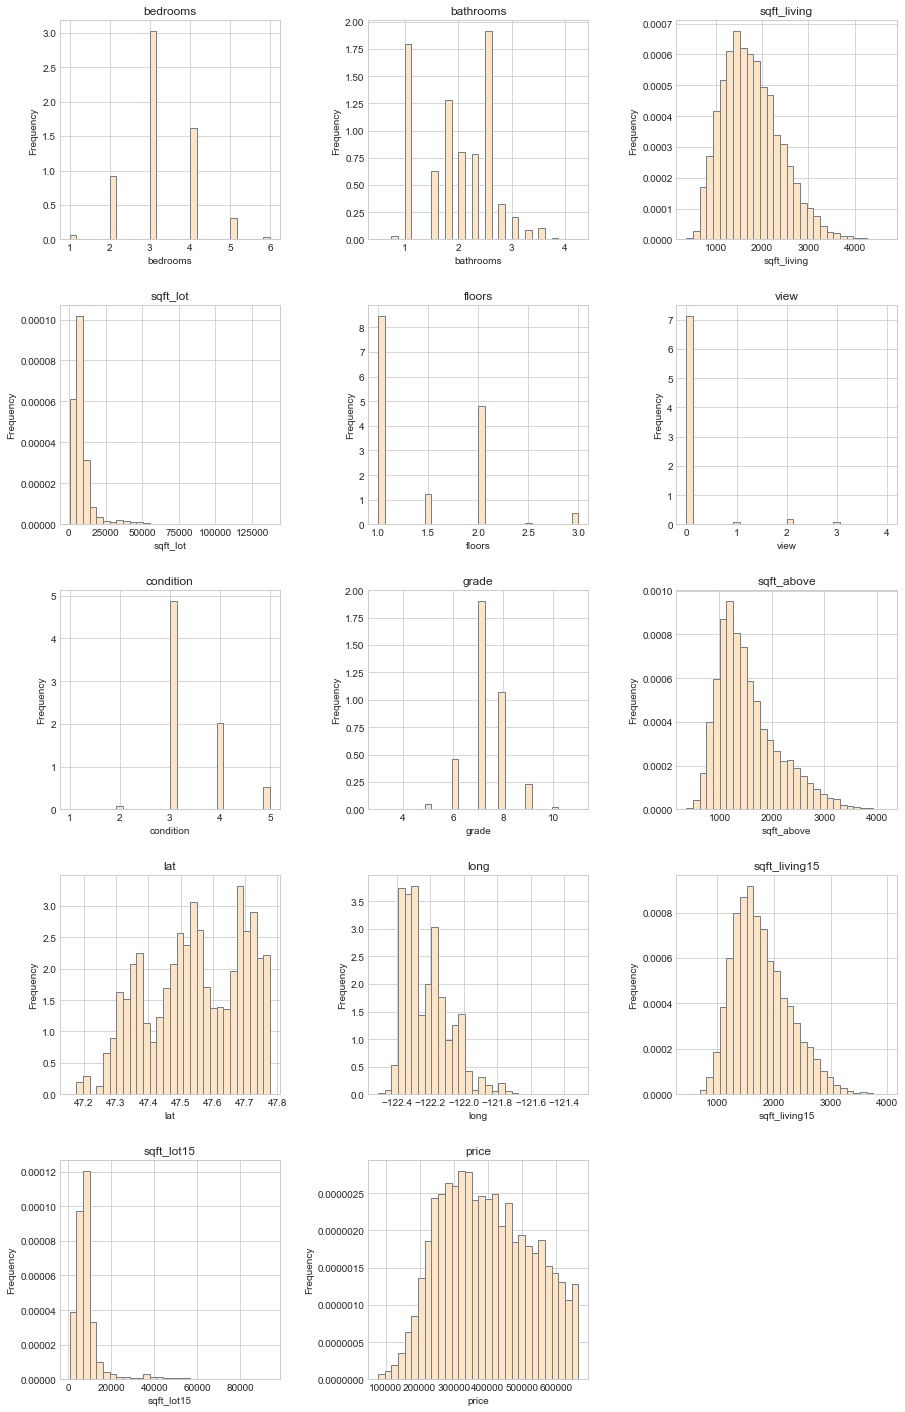

In [48]:
fig = plt.figure(figsize = (15,25))
fig.subplots_adjust(hspace=0.3, wspace=0.4)
for i in range(0,df_edited_2.shape[1]):
    ax = fig.add_subplot(5, 3, (i + 1))
    x = df_edited_2.iloc[:,i]
    ax.hist(x, density = True, bins=30, color = "bisque", edgecolor = 'slategray');
    ax.set_ylabel("Frequency");
    ax.set_xlabel("{}".format(df_edited_2.columns[i]))
    ax.set_title(df_edited_2.columns[i]);

Thoughts on the normality of the data:

* The price datset is still skewed, but not as much as previously. This could be improved by finding the log of the data but it would then decrease the interpretability of future models, so I'm hesitant to transform the data in any significant way.
* Histograms indicating non-normal distributions: 
   - view (it looks broadly normal except for the 0 view that is completely skewing the data)
   - lat (does show some normal tendency to the left of the histogram but this breaks down as lat increases).
* Histograms indicating extreme skew:
   - sqft_lot15
   - sqft_lot
   - condition

* In order to conclude which of the columns are normal, I will run QQ plots of all columns and then decide which to remove.

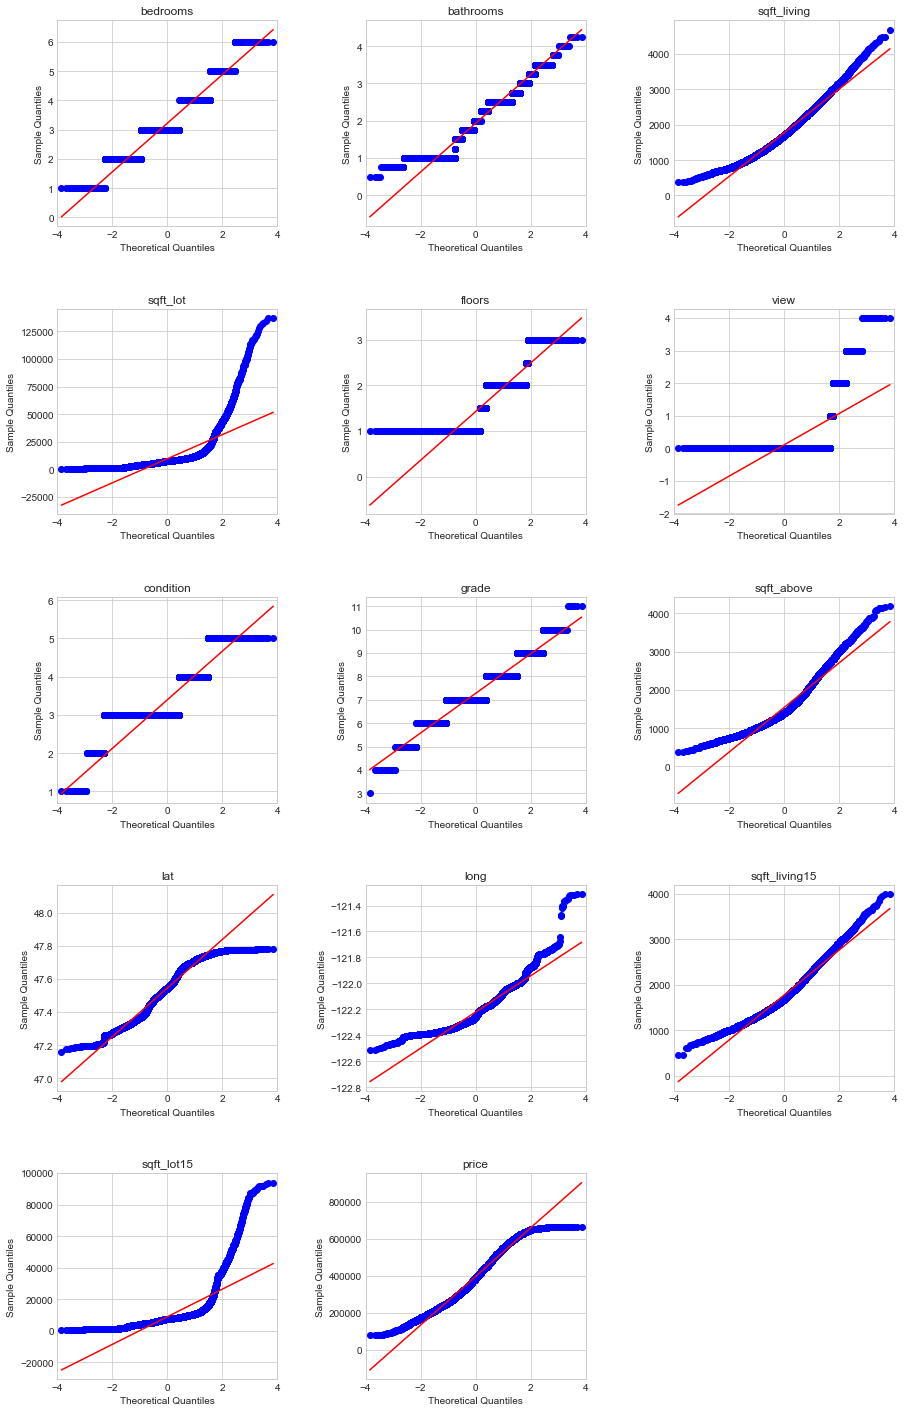

In [49]:
fig = plt.figure(figsize = (15,25))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(0,df_edited_2.shape[1]):
    ax = fig.add_subplot(5, 3, (i + 1))
    x = df_edited_2.iloc[:,i]
    sm.qqplot(x, ax = ax, line = 's')
    ax.set_title(df_edited_2.columns[i])
pylab.show()

As can be seen above, the QQ plots confirm to me that **sqft_lot, sqft_lot15 and view are not normal.**

Moreover, the following columns could be logged in order to make them more normal: price, sqft_living15, sqft_above, sqft_living, long, lat.

##### I am therefore removing view, sqft_lot and sqft_lot15 as column from the dataset, due to lack of normality. I will not yet create a log dataframe but will keep it in mind for future use of needed.

In [50]:
df_edited_2.drop(["view","sqft_lot", "sqft_lot15"], axis = 1, inplace = True)

### 3) Homoscedasticity

The last linear assumption that needs to be passed is homoscedasticity - this needs error terms to be studied in order to prove / disprove this. I will therefore evaluate this property once our model is created.

### 4) Multicollinearity

Another factor to consider when creating my model is any existing colinearity that might affect the reliability of the predictions. 

Log functionality affects the normality of each feature and correlation between features, so before creating a log of my data I will assess the correlation of the dataset to see if there are any correlations.

In [51]:
df_edited_2.drop(["price"], axis = 1, inplace = True)

In [52]:
print("Correlation matrix of features: ")
df_edited_2.corr()

Correlation matrix of features: 


,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,lat,long,sqft_living15
bedrooms,1.000000,0.469455,0.618528,0.119726,0.024464,0.290507,0.476036,-0.103188,0.152927,0.380262
bathrooms,0.469455,1.000000,0.674844,0.506858,-0.146827,0.575367,0.594364,-0.086141,0.241171,0.499994
sqft_living,0.618528,0.674844,1.000000,0.290532,-0.067762,0.599770,0.817073,-0.107585,0.257281,0.698193
floors,0.119726,0.506858,0.290532,1.000000,-0.282725,0.436317,0.508129,-0.005959,0.117909,0.225068
condition,0.024464,-0.146827,-0.067762,-0.282725,1.000000,-0.180908,-0.167593,-0.028705,-0.057388,-0.129896
grade,0.290507,0.575367,0.599770,0.436317,-0.180908,1.000000,0.602719,-0.000756,0.174990,0.570451
sqft_above,0.476036,0.594364,0.817073,0.508129,-0.167593,0.602719,1.000000,-0.176188,0.359152,0.666622
lat,-0.103188,-0.086141,-0.107585,-0.005959,-0.028705,-0.000756,-0.176188,1.000000,-0.146526,-0.084395
long,0.152927,0.241171,0.257281,0.117909,-0.057388,0.174990,0.359152,-0.146526,1.000000,0.323466
sqft_living15,0.380262,0.499994,0.698193,0.225068,-0.129896,0.570451,0.666622,-0.084395,0.323466,1.000000


These are informative but it's difficult to see if there is strong (or even weak) correlation. An overlaid heatmap should make it clearer:

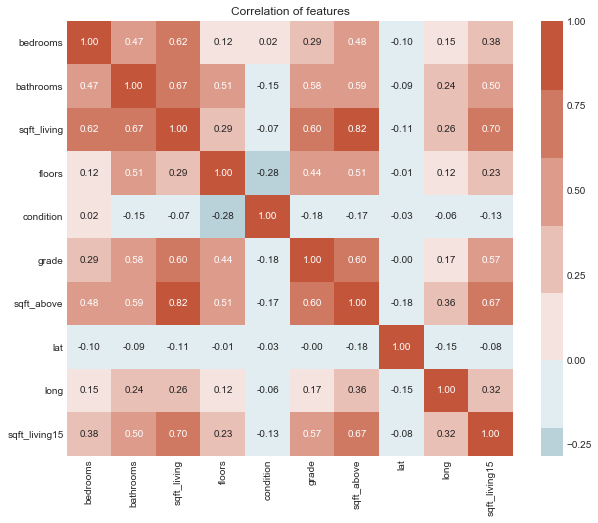

In [53]:
fig, axes = plt.subplots(1, figsize=(10,8))
cmap = sns.diverging_palette(220, 20, n=10)
sns.heatmap(df_edited_2.corr(), center=0, cmap = cmap, annot=True, fmt='.2f', ax = axes);
axes.set_title('Correlation of features');

The above shows that there is 1 instance of abs(correlation) > 0.75 .. **sqft_living / sqft_above**. This is to be expected as we derived one from the other above, and intuitively if the sqft of the area above the basement increases, the sqft of the overall property will too.**Therefore we will not use this pair in conjunction with each other in future models.**

Corr > 0.6 that should also be flagged:
* Sqft_living / bedrooms
* Sqft_living / bathrooms
* Sqft_living15 / sqft_living
* Sqft_living15 / sqft_above

These correlations will be closely considered in future models. 

In [54]:
#Adding the price column back to df_edited_2 for completeness
df_edited_2 = df_edited_2.join(df_price, how = 'outer')

# Section D: Data Exploration and Hypothesis Testing

Now that I have a clean data set and know of existing correlation, my aim in this third section is to create three questions that will for the basis of my hypotheses. 

Points that I will be watching out for whilst working through my three questions:
* Do I need to create logarithms or standardise my data in order to make it a more coherent, normal dataset? This has been indicated above might be useful as the data is moderately skewed but it will decrease the interpretability of the data.
* Are there any codependencies that still need to be addressed in the data?
* Does any model that I make to reject the null hypothesis pass the necessary linear assumptions?

Once I have rejected the null hypotheses I will then show the conclusions in a simple but effective data visualisation.

## Question 1: Does where you live (latitude/ longitude) affect house price?

#### Null Hypothesis: Location of a house on the map has no relationship with the house price at point of sale.


As seen above in the linearity scatter plots, long/ lat columns do not look to have a strong linear relationship with house price **however** I still wanted to pose the question as to whether location affects house price at all. Moreover, long did look to have some weak correlation so that may be investigated further here. 

If visually a non-linear relationship is seen, it proves that non-linear components might also affect the model and the final multiple linear regression can still be improved upon with more advanced techniques (in the future).

I'm interested to know if house price has any relationship with longitude/ latitude in this area. A scatter graph also has the double affect of acting as a 'map' for the area, so a quick relationship can be deduced: 


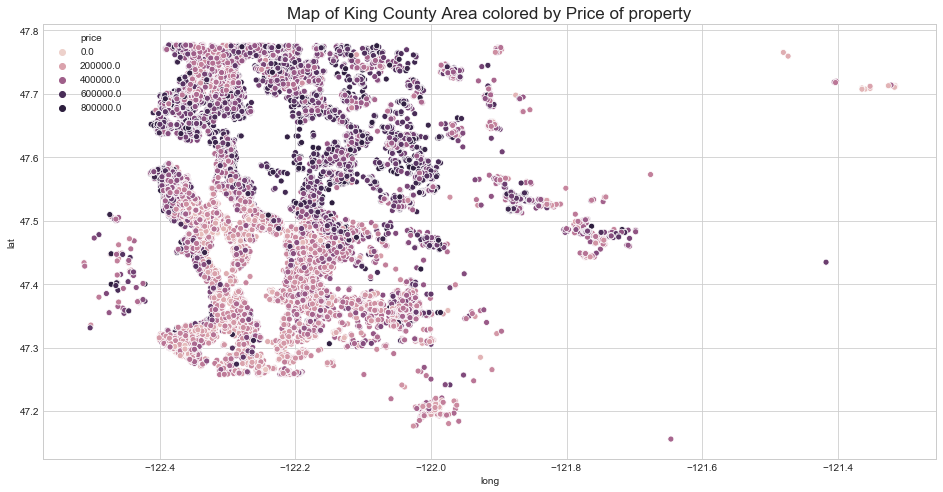

In [55]:
df_geog = df_edited[['price', 'long', 'lat']].copy()
fig, ax = plt.subplots(figsize = (16,8))
sns.scatterplot(ax = ax, x="long", y="lat", data=df_geog, hue = 'price');
ax.set_title("Map of King County Area colored by Price of property", size = 17);

As can be seen above, there does look to be a relationship between house price and geophaphical location but it does not look to be linear (when both features are considered). There looks to be a cluster of increased house price in the upper central area of King County, but I cannot map this using OLS regression.

There does, however, look to be a linear correlation between price and latitude (the price looks to be getting approximately darker as lat increases on the y scale).

The null hypothesis is therefore valid in this instance when considering both features, but enhances my later conclusions on the OLS model I will create when still considering lat.

## Question 2: Do the number of bedrooms affect house price?

#### Null Hypothesis: Number of bedrooms have no linear relationship with the house price at point of sale.

This is a question where I would expect to be successful at rejecting the null hypothesis, however assuming would be the worst thing to do when exploring correlation/ relationships with the dependent variable. 

Originally, in the larger set of data df_edited, the correlation between bedrooms and price was only **0.296**, indicating that there was a weak relationship at best between the number of bedrooms and price of the property. I am interested to see if this has changed after reducing the dataset to 80% of the total values.

Moreover, having just found out that bedrooms and sqft_living are quite highly correlated, I will need to pose the question of causation even if the null hypothesis can be rejected.

In [56]:
#Create a subset and check for correlation. 
df_bedrooms_price = df_edited_2[['bedrooms', 'price']]

pearsons_coeff_price_bedrooms = df_bedrooms_price.corr()
pearsons_coeff_price_bedrooms

,bedrooms,price
bedrooms,1.000000,0.203582
price,0.203582,1.000000


This is a surprise; after removing the top 10% of house prices from the dataset (in order to reduce the skew of the data and make any model more applicable to the majority of cases) the **price vs bedroom correlation has decreased from 0.296 to 0.203**. This shows that the null hypothesis will probably be successful; but to be sure, I will run an OLS model quickly to gather statistical evidence of a valid null hypothesis.

In [57]:
f = 'price~bedrooms'
model_bedrooms = ols(formula=f, data=df_edited_2).fit()
model_bedrooms.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     701.6
Date:                Tue, 02 Jul 2019   Prob (F-statistic):          2.21e-151
Time:                        22:51:55   Log-Likelihood:            -2.1397e+05
No. Observations:               16228   AIC:                         4.279e+05
Df Residuals:                   16226   BIC:                         4.280e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.937e+05   4031.564     72.850      0.000    2.86e+05    3.02e+05
bedrooms    3.212e+04   1212.682     26.487      0.000    2.97e+04    3.45e+04
==============================================================================
Omnibus:                     2125.831   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              617.593
Skew:                           0.184   Prob(JB):                    7.79e-135
Kurtosis:                       2.118   Cond. No.                         14.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
#Calculating the RMSE value for bedrooms vs price model, to see how far off the model is (on average)
X_bedrooms = df_edited_2[['bedrooms']].copy()
y = df_edited_2[['price']].copy()

y_pred_bedrooms = model_bedrooms.predict(X_bedrooms)

rmse_bedrooms = sqrt(mean_squared_error(y, y_pred_bedrooms))
percentage_off = rmse_bedrooms / np.mean(y)
print("The RMSE of the price~bedrooms model is: "+str(rmse_bedrooms))
print("This means that compared to the average home the model is "+str(percentage_off[0])+"% wrong.")

The RMSE of the price~bedrooms model is: 128823.97466580251
This means that compared to the average home the model is 0.3244373173322158% wrong.


Well yep, that proves it. The R squared value of this single linear regression model is only 0.04, indicating that there is no linear relationship at all between the number of bedrooms in a property and it's sale price. Moreover, the RMSE value is indicating that the model is on average 32% away from the true sale price.

**We can therefore comfortably accept the null hypothesis and discard bedrooms from future analysis.**

In [59]:
df_edited_2.drop(["bedrooms"], axis = 1, inplace = True)

## Question 3: Does the grade of a property affect house price?

#### Null Hypothesis: Grade of a house has no linear relationship with the house price.

It can be seen above in Section B that grade is one of the most normal datasets and looked to follow a linear pattern in the scatter plot (although this is difficult to see due to the categorical nature of the plot). It is therefore worth exploring in more detail if the grade of property and house price have a relationship.

Initial best fit line:
y = -147088.13 + 74781.56x


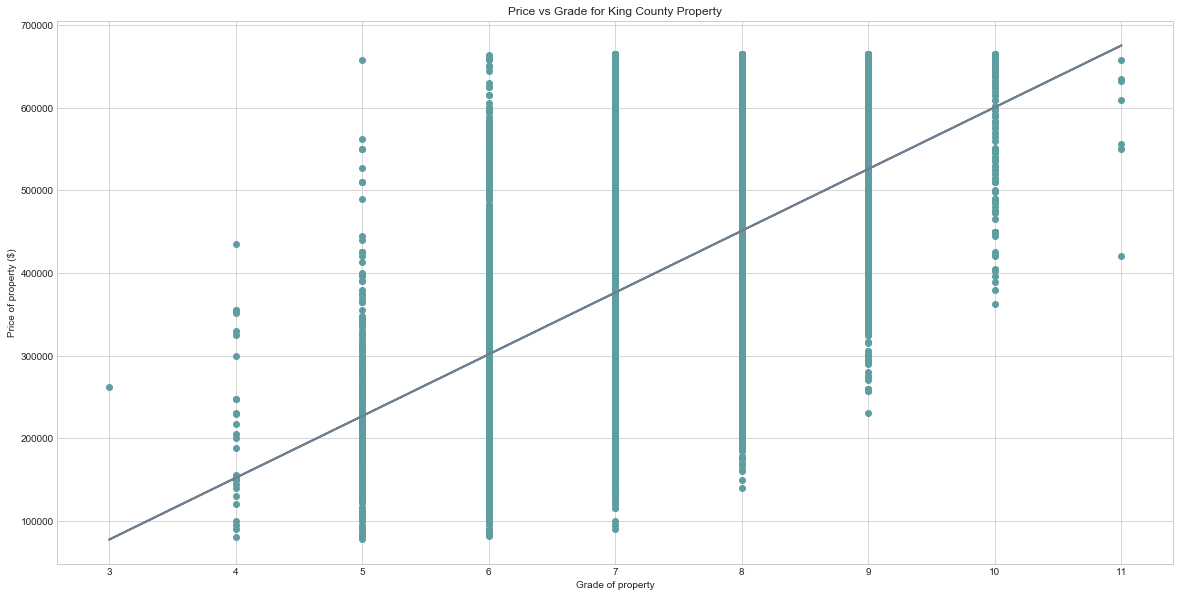

In [60]:
# Defining an initial line of best fit for the scatter graph of grade vs price
X = df_edited_2["grade"]
Y = df_edited_2["price"]

f, g = best_fit(X, Y)

# Plot an overlaid scatter and line graph to show approximate fit
plt.scatter(X, Y, color = 'cadetblue');
yfit = [f + g * xi for xi in X]
plt.plot(X, yfit, c = 'slategray', linewidth = 2);

plt.xlabel('Grade of property');
plt.ylabel('Price of property ($)');
plt.title('Price vs Grade for King County Property');
plt.gcf().set_size_inches((20, 10)) 
plt.show()

It looks from the above like Grade and Price have a linear relationship, but the dispersion of data from the line of best fit is quite wide. Below creates an OLS model that will allow me to numerically analyse the relationship further.

In [61]:
# build the formula 
f = 'price~grade'
model_grade = ols(formula=f, data=df_edited_2).fit()
model_grade.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     4911.
Date:                Tue, 02 Jul 2019   Prob (F-statistic):               0.00
Time:                        22:51:56   Log-Likelihood:            -2.1217e+05
No. Observations:               16228   AIC:                         4.243e+05
Df Residuals:                   16226   BIC:                         4.244e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.471e+05   7817.380    -18.816      0.000   -1.62e+05   -1.32e+05
grade       7.478e+04   1067.091     70.080      0.000    7.27e+04    7.69e+04
==============================================================================
Omnibus:                      783.468   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              461.768
Skew:                           0.271   Prob(JB):                    5.35e-101
Kurtosis:                       2.376   Cond. No.                         64.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
#Calculating the RMSE value for grade vs price model
X_grade = df_edited_2[['grade']].copy()

y_pred_grade = model_grade.predict(X_grade)

rmse_grade = sqrt(mean_squared_error(y, y_pred_grade))
percentage_off_grade = rmse_grade / np.mean(y)
print("The RMSE of the price~grade model is: $"+str(round(rmse_grade,2)))
print("This means that compared to the average home the model is "+str(round(percentage_off_grade[0]*100,2))+"% wrong.")

The RMSE of the price~grade model is: $115284.38
This means that compared to the average home the model is 29.03% wrong.


Well this has yielded a mixed bag..  

* The R-squared value is only 0.232 which is quite low given grade is supposed to be one of the highest correlated values to price. However, R squared was only 0.407 before the upper 10% of the price tail was dropped. We should therefore also use other indicators to evaluate the model.
* JB  Test = 461 ... JB > 6 is the standard threshold over which error terms are considered non-normal.
* Kurtois Test = 2.4 .. K > 3 therefore suggesting that the data is fairly normally distributed.
* Skew = 0.27 therefore confirming that the data is fairly normal.
* The P > |t| value for grade is 0 indicating that the variable coefficient has no chance of equalling zero, confirming a relationship.

This slightly non-normal data might be improved if I analysed price_log. Below I have therefore explored this option to see if it would yield a better model.

In [63]:
to_log = ["price"]
for i in to_log:
    df_edited_2["{}_log".format(i)] = df_edited_2[i].apply(np.log)

f = 'price_log~grade'
model_2 = ols(formula=f, data=df_edited_2).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     5156.
Date:                Tue, 02 Jul 2019   Prob (F-statistic):               0.00
Time:                        22:51:56   Log-Likelihood:                -4203.1
No. Observations:               16228   AIC:                             8410.
Df Residuals:                   16226   BIC:                             8426.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.3151      0.021    532.257      0.000      11.273      11.357
grade          0.2084      0.003     71.808      0.000       0.203       0.214
==============================================================================
Omnibus:                      254.446   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              259.321
Skew:                          -0.296   Prob(JB):                     4.89e-57
Kurtosis:                       2.817   Cond. No.                         64.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Initial best fit line:
y = 11.32 + 0.21x


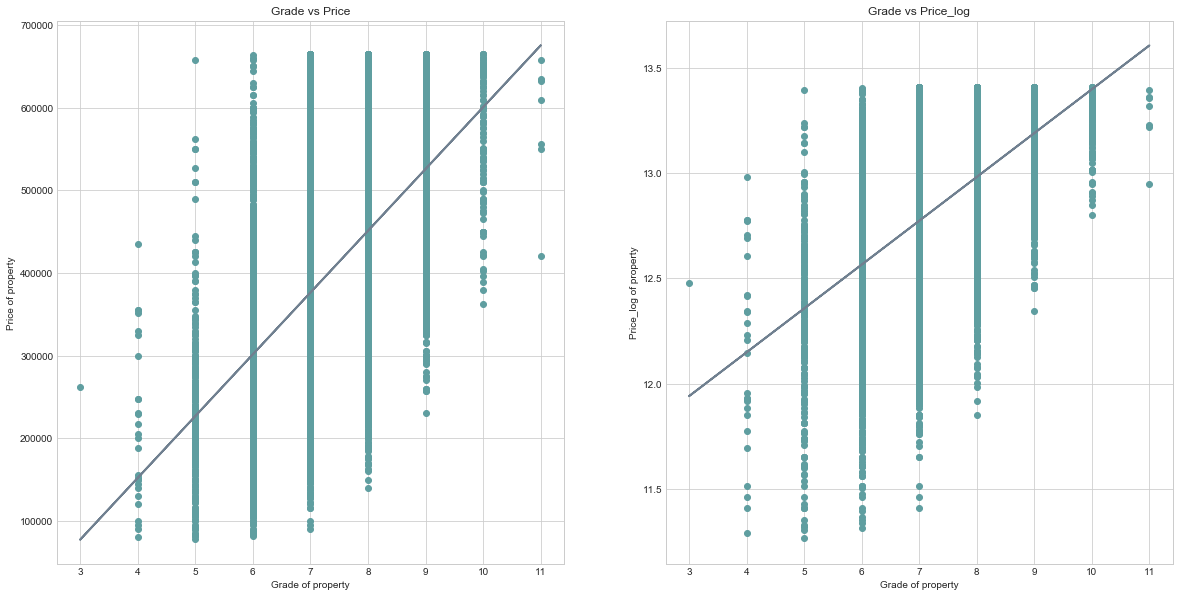

In [64]:
Y1 = df_edited_2['price_log']

h, j = best_fit(X, Y1)
y1fit = [h + j * xi for xi in X]

new_figure = plt.figure(figsize = (20,10))
ax = new_figure.add_subplot(121)
ax2 = new_figure.add_subplot(122)

ax.scatter(X, Y, c = 'cadetblue')
ax.plot(X, yfit, c='slategray', linewidth=2)
ax.set_title('Grade vs Price')
ax.set_xlabel('Grade of property');
ax.set_ylabel('Price of property');

ax2.scatter(X, Y1, c = 'cadetblue')
ax2.plot(X, y1fit, c='slategray', linewidth=2)
ax2.set_title('Grade vs Price_log')
ax2.set_xlabel('Grade of property');
ax2.set_ylabel('Price_log of property');

plt.show()

The log has not really helped .. it's improved the skew slightly but has increased the K- value and hasn't significantly affected the JB-value (it is still not below the threshold of 6). R-squared has also increased only a fraction to 0.22, therefore I can conclude that I do not need to log this set in order to improve the conclusion.

**The model here is not strong as there are multiple factors that affect price (not just grade), but it is clear that grade does affect price of the model for this dataset**.

In [65]:
df_edited_2.drop('price_log', axis = 1, inplace = True)

# Section E: House Price Model
   
One major problem with the above analysis is that there are *multiple factors* that affect house price. To simplify these into 1 - 2 hypotheses would be incomplete and potentially lead to incorrect predictions. In the next section I will therefore create a fitted multivariable linear regression model to answer completely what factors affect house prices, and by how much. My approach will include:

1) Initial visualisations to approximate linearity (this was done above)

2) Find correlation between price and all features

3) Create an OLS model with the highest correlated feature to get a baseline for R squared. Then add 2 more features to create a 3 feature OLS model

4) Interpret the statistical results to determine how good the model is

5) Rank features with recursive feature elimination (RFE) to determine the optimal number of features to use in the model

6) Run another OLS model using the number of features determines as optimal

7) Use K-Fold cross validation with 50 iterations to validate the accuracy of the model


At this stage I will not log data for the models. Using the standard data will make my model more interpretable but will potentially reduce accuracy, which logs may provide. I will therefore attempt to create models using the standard data, and if the results are not accurate enough will instead use logs.

In [66]:
x_cols = df_edited_2.columns

# Step 2 : Find correlation between price and all features
pearsons_coeff_2 = df_edited_2[df_edited_2.columns[0:]].corr()['price'][:-1]
pearsons_coeff_2.sort_values(ascending = False, inplace = True)
pearsons_coeff_2

lat              0.501011
grade            0.482025
sqft_living      0.445322
sqft_living15    0.405598
bathrooms        0.348247
sqft_above       0.339865
floors           0.220260
long             0.051988
condition        0.015613
Name: price, dtype: float64

From Section B I know that there is correlation between sqft_living and bathrooms/ sqft_living15, however sqft_living is not correlated with grade or lat. Therefore correlation table suggest creating the initial model using sqft_living, lat and grade (we also know that the initial benchmark single linear regression, price~grade, yields an R squared value of 0.232).

In [67]:
# Step 5: Rank features with recursive feature elimination (RFE) to see which features to use.
X = df_edited_2[x_cols]
y = df_edited_2['price']
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 4)
selector = selector.fit(X, df_edited_2["price"])

In [68]:
ranking = selector.ranking_
ranking.tolist()
RFE_selection = pd.DataFrame(np.column_stack([ranking, x_cols]), 
                               columns=['Order', 'Features'])
RFE_selection

,Order,Features
0,2,bathrooms
1,5,sqft_living
2,3,floors
3,4,condition
4,1,grade
5,7,sqft_above
6,1,lat
7,1,long
8,6,sqft_living15
9,1,price


The recursive feature elimination therefore seems to be showing that lat, long and grade are the 3 features that I should be using for my OLS model. I will therefore run 2 models to see which yield's the best result.

In [69]:
# Step 3: Create the first OLS model with the three highest correlated variables
X_three_corr = df_edited_2[['sqft_living', 'lat', 'grade']].copy()
y = df_edited_2[['price']].copy()

f = 'price~sqft_living+lat+grade'
model_corr_matrix = ols(formula=f, data=df_edited_2).fit()
predictions_corr_matrix = model_corr_matrix.predict(X) # make the predictions by the model

# Print out the statistics
model_corr_matrix.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     6712.
Date:                Tue, 02 Jul 2019   Prob (F-statistic):               0.00
Time:                        22:51:57   Log-Likelihood:            -2.0776e+05
No. Observations:               16228   AIC:                         4.155e+05
Df Residuals:                   16224   BIC:                         4.156e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.288e+07   2.25e+05   -101.792      0.000   -2.33e+07   -2.24e+07
sqft_living    70.9413      1.405     50.483      0.000      68.187      73.696
lat          4.803e+05   4732.304    101.504      0.000    4.71e+05     4.9e+05
grade        4.378e+04   1020.048     42.919      0.000    4.18e+04    4.58e+04
==============================================================================
Omnibus:                      402.699   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              440.079
Skew:                           0.375   Prob(JB):                     2.74e-96
Kurtosis:                       3.296   Cond. No.                     6.12e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
# Step 7: Run K-fold cross validation for the model to see how accurate it is
cv_50_results = np.mean(cross_val_score(linreg, X_three_corr, y, cv = 50, scoring="neg_mean_squared_error"))
RMSE_corr_three = np.sqrt(abs(cv_50_results))
print("MSE for the RFE model is: " + str(round(abs(cv_50_results), 2)))
print("RMSE for the RFE model is: $" + str(round(RMSE_corr_three,2)))

MSE for the RFE model is: 7728791573.33
RMSE for the RFE model is: $87913.55


The MSE shows you the average distance of the predicted value from the regression line, so the smaller the better. The average root mean squared error for this model is $87,913 which considering the size of the dataset and potential cross-correlation/ non-linear factors at play is not large.

Moreover, my initial thoughts on model 1:

* The R squared value is improved to 0.554; this is to be expected as more variables are added but is still a good indicator of a good model fit. 
* The dataset looks to be approximately normal (using the Kurtosis and JB values) and non-skewed.
* P > |t| is 0 for all coefficients indicating that all are significant to the model.

I'll see below how model 1's stats compare to model 2's.

In [71]:
# Step 3: Run another OLS model using the number of features determines as optimal by RFE
X_RFE = df_edited_2[['grade', 'long', 'lat']].copy()

f2 = 'price~grade+long+lat'
model_RFE = ols(formula=f2, data=df_edited_2).fit()
predictions_RFE = model_RFE.predict(X_RFE) # make the predictions by the model

# Print out the statistics
model_RFE.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     5103.
Date:                Tue, 02 Jul 2019   Prob (F-statistic):               0.00
Time:                        22:51:58   Log-Likelihood:            -2.0892e+05
No. Observations:               16228   AIC:                         4.178e+05
Df Residuals:                   16224   BIC:                         4.179e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.675e+07   6.74e+05    -24.857      0.000   -1.81e+07   -1.54e+07
grade       7.367e+04    887.632     82.991      0.000    7.19e+04    7.54e+04
long        4.071e+04   5438.766      7.485      0.000       3e+04    5.14e+04
lat          4.54e+05   5092.522     89.156      0.000    4.44e+05    4.64e+05
==============================================================================
Omnibus:                      274.959   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              289.083
Skew:                           0.320   Prob(JB):                     1.68e-63
Kurtosis:                       3.134   Cond. No.                     1.19e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
# Step 7: Run K-fold cross validation for the model to see how accurate it is
cv_50_results_RFE = np.mean(cross_val_score(linreg, X_RFE, y, cv = 50, scoring="neg_mean_squared_error"))
RMSE_RFE = np.sqrt(abs(cv_50_results_RFE))
print("MSE for the RFE model is: " + str(round(abs(cv_50_results), 2)))
print("RMSE for the RFE model is: $" + str(round(RMSE_RFE,2)))

MSE for the RFE model is: 7728791573.33
RMSE for the RFE model is: $94420.71


* The correlation matrix yields a better model than RFE feature ranking
 - R squared is higher for the correlation matrix model.
 - The RMSE value is lower.
 
* The model generated from the correlation matrix is not a good model. 
- R-squared is 0.554, which is significant but might be slightly lower because there are non-linear relationships between price and the features too. 
- P > t = 0 for all coefficients, indicating that the features are normally distributed.
- JB value and Kurtosis are within the bounds of a normal dataset.
- The coefficients are also of different scales because the data sizes are all different. 

This is a good model but I want to check that there are not more features that would benefit from being added. I will therefore run this model for features = 4 to check that we can't get R squared significantly higher. The next highest correlated feature that is not also correlated to sqft_living is bathrooms, but even this is slightly correlated. 

In [73]:
pearsons_coeff_2

lat              0.501011
grade            0.482025
sqft_living      0.445322
sqft_living15    0.405598
bathrooms        0.348247
sqft_above       0.339865
floors           0.220260
long             0.051988
condition        0.015613
Name: price, dtype: float64

In [74]:
# Step 3: Create the first OLS model with the three highest correlated variables
X_four_feat = df_edited_2[['sqft_living', 'lat', 'grade', 'bathrooms']].copy()
y3 = df_edited_2[['price']].copy()

f = 'price~sqft_living+lat+grade+bathrooms'
model_corr_matrix_4_feat = ols(formula=f, data=df_edited_2).fit()
predictions_corr_matrix_4 = model_corr_matrix_4_feat.predict(X_four_feat) # make the predictions by the model

# Print out the statistics
model_corr_matrix_4_feat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     5036.
Date:                Tue, 02 Jul 2019   Prob (F-statistic):               0.00
Time:                        22:51:59   Log-Likelihood:            -2.0776e+05
No. Observations:               16228   AIC:                         4.155e+05
Df Residuals:                   16223   BIC:                         4.156e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -2.29e+07   2.25e+05   -101.792      0.000   -2.33e+07   -2.25e+07
sqft_living    69.4517      1.619     42.889      0.000      66.278      72.626
lat          4.807e+05   4736.456    101.496      0.000    4.71e+05     4.9e+05
grade         4.32e+04   1066.247     40.520      0.000    4.11e+04    4.53e+04
bathrooms    2766.5858   1494.844      1.851      0.064    -163.473    5696.644
==============================================================================
Omnibus:                      413.112   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              452.338
Skew:                           0.380   Prob(JB):                     5.97e-99
Kurtosis:                       3.301   Cond. No.                     6.12e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
model_corr_matrix.params

Intercept     -2.288497e+07
sqft_living    7.094126e+01
lat            4.803470e+05
grade          4.377930e+04
dtype: float64

The R squared value has not increased at all and the rest of the model indicators have worsened, showing that I have found the peak R squared value for this dataset. 

### I therefore can conclude that my final model for house prices in King County, that can predict prices between 0 and ~665,000 USD is:

In [76]:
intercept = str(round(model_corr_matrix.params[0],2))
sqft_coeff = str(round(model_corr_matrix.params[1],2))
lat_coeff = str(round(model_corr_matrix.params[2],2))
grade_coeff = str(round(model_corr_matrix.params[3],2))

In [77]:
print("House price = "+sqft_coeff+"(sqft_living) + "+lat_coeff+"(latitude) + "+grade_coeff+"(Grade) "+intercept)

House price = 70.94(sqft_living) + 480347.01(latitude) + 43779.3(Grade) -22884972.46
